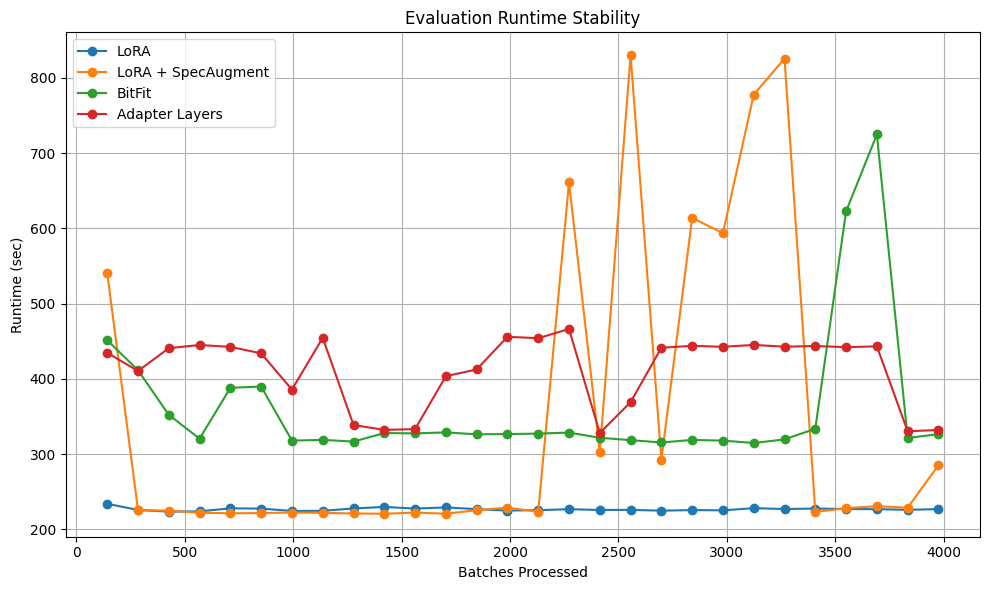

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def load_csv(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"{file_path} not found.")
    return pd.read_csv(file_path)[['Step', 'Value']]

def auto_range(series, buffer_ratio=0.05):
    """Compute a dynamic axis range with a buffer around the min and max."""
    min_val = series.min()
    max_val = series.max()
    buffer = (max_val - min_val) * buffer_ratio
    return min_val - buffer, max_val + buffer

def plot_multiple_curves(dfs, labels, x_col="Step", y_col="Value", 
                         x_label="Batches Processed", y_label="Runtime", title="Evaluation Runtime"):
    plt.figure(figsize=(10, 6))
    
    for df, label in zip(dfs, labels):
        plt.plot(df[x_col], df[y_col], marker='o', linestyle='-', label=label)

    # Labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Combine all steps and values to determine dynamic axis range
    all_steps = pd.concat([df[x_col] for df in dfs])
    all_values = pd.concat([df[y_col] for df in dfs])

    x_min, x_max = auto_range(all_steps)
    y_min, y_max = auto_range(all_values)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    base_path = "efficiency_curves"
    filenames = [
        "lora_evaluation_runtime.csv",
        "spec_evaluation_runtime.csv",
        "bitfit_evaluation_runtime.csv",
        "adapter_evaluation_runtime.csv"
    ]

    labels = [
        "LoRA",
        "LoRA + SpecAugment",
        "BitFit",
        "Adapter Layers"
    ]

    # Load all datasets
    dfs = [load_csv(os.path.join(base_path, filename)) for filename in filenames]

    # Plot all together
    plot_multiple_curves(dfs, labels, 
                         x_label="Batches Processed", 
                         y_label="Runtime (sec)", 
                         title="Evaluation Runtime Stability")


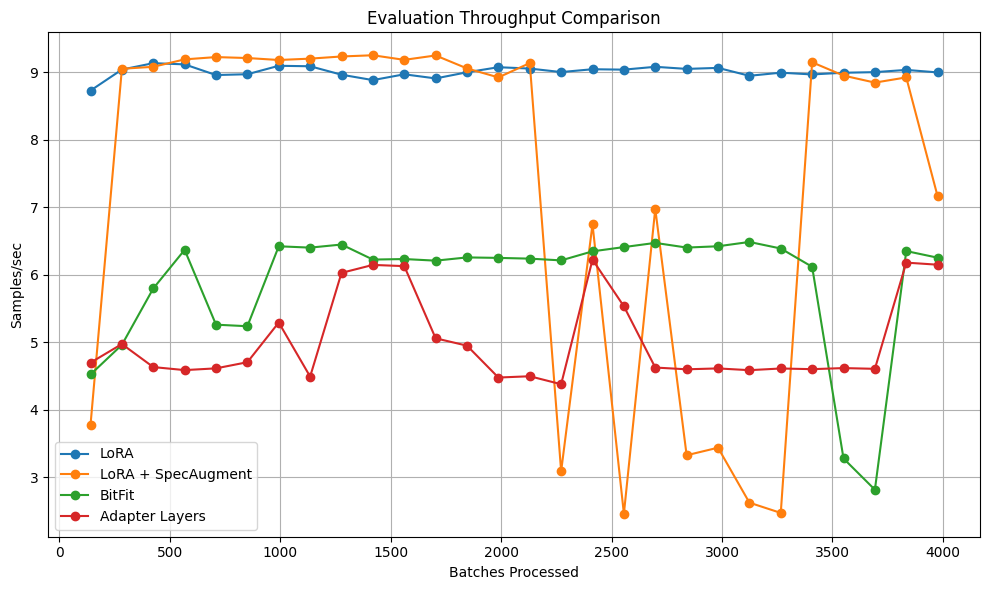

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def load_csv(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"{file_path} not found.")
    return pd.read_csv(file_path)[['Step', 'Value']]

def auto_range(series, buffer_ratio=0.05):
    """Compute a dynamic axis range with a buffer around the min and max."""
    min_val = series.min()
    max_val = series.max()
    buffer = (max_val - min_val) * buffer_ratio
    return min_val - buffer, max_val + buffer

def plot_multiple_curves(dfs, labels, x_col="Step", y_col="Value", 
                         x_label="Batches Processed", y_label="Runtime", title="Evaluation Runtime"):
    plt.figure(figsize=(10, 6))
    
    for df, label in zip(dfs, labels):
        plt.plot(df[x_col], df[y_col], marker='o', linestyle='-', label=label)

    # Labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Combine all steps and values to determine dynamic axis range
    all_steps = pd.concat([df[x_col] for df in dfs])
    all_values = pd.concat([df[y_col] for df in dfs])

    x_min, x_max = auto_range(all_steps)
    y_min, y_max = auto_range(all_values)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    base_path = "efficiency_curves"
    filenames = [
        "lora_evaluation_samples_per_sec.csv",
        "spec_evaluation_samples_per_sec.csv",
        "bitfit_evaluation_samples_per_sec.csv",
        "adapter_evaluation_samples_per_sec.csv"
    ]

    labels = [
        "LoRA",
        "LoRA + SpecAugment",
        "BitFit",
        "Adapter Layers"
    ]

    # Load all datasets
    dfs = [load_csv(os.path.join(base_path, filename)) for filename in filenames]

    # Plot all together
    plot_multiple_curves(dfs, labels, 
                         x_label="Batches Processed", 
                         y_label="Samples/sec", 
                         title="Evaluation Throughput Comparison")


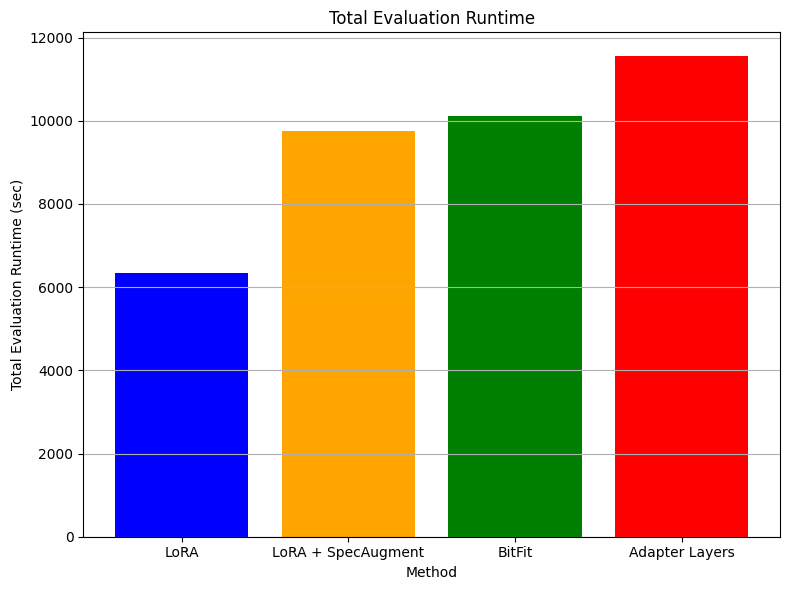

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSVs
spec_df = pd.read_csv("efficiency_curves/spec_evaluation_runtime.csv")
adapter_df = pd.read_csv("efficiency_curves/adapter_evaluation_runtime.csv")
bitfit_df = pd.read_csv("efficiency_curves/bitfit_evaluation_runtime.csv")
lora_df = pd.read_csv("efficiency_curves/lora_evaluation_runtime.csv")

# Sum of evaluation runtimes
total_runtimes = {
    "LoRA": lora_df['Value'].sum(),
    "LoRA + SpecAugment": spec_df['Value'].sum(),
    "BitFit": bitfit_df['Value'].sum(),
    "Adapter Layers": adapter_df['Value'].sum()
}

# Plotting the histogram
methods = list(total_runtimes.keys())
runtime_values = list(total_runtimes.values())

plt.figure(figsize=(8, 6))
plt.bar(methods, runtime_values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Method')
plt.ylabel('Total Evaluation Runtime (sec)')
plt.title('Total Evaluation Runtime')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
